# Александр Чернышёв

## Домашнее задание по курсу "Алгоритмы интеллектуальной обработки больших объемов данных" №1

**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)<br>
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist<br>
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist<br>
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from scipy import stats
%load_ext pycodestyle_magic

/usr/local/lib/python3.7/site-packages/pycodestyle.py:113: FutureWarning: Possible nested set at position 1
  EXTRANEOUS_WHITESPACE_REGEX = re.compile(r'[[({] | []}),;:]')


## Задания 1 и 2

In [2]:
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.k = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X = X.astype(float)
        self.y = y.astype(int)
        if self.algorithm == 'kd_tree':
            self.KDTree = KDTree(X)

    def _get_KNN(self, X):
        X = X.astype(float)
        if self.algorithm == 'kd_tree':
            return self.KDTree.query(X, k=self.k, return_distance=False)
        dists = (X ** 2).sum(axis=1)[:, None] - 2 * X.dot(self.X.T) +\
            (self.X.T ** 2).sum(axis=0)
        return np.argsort(dists, axis=1)[:, :self.k]

    def _get_predictions(self, X):
        return self.y[self._get_KNN(X)]

    def predict(self, X):
        return stats.mode(self._get_predictions(X), axis=1)[0].ravel()

    def predict_proba(self, X):
        predictions = self._get_predictions(X)
        proba = np.zeros((len(X), len(np.unique(self.y))), dtype=float)
        for col in predictions.T:
            proba[np.arange(len(X)), col] += 1
        return proba / self.k

    def score(self, X, y):
        return (y.astype(int) == self.predict(X.astype(float))).mean()

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.52 ms, sys: 528 µs, total: 2.04 ms
Wall time: 1.69 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 148 µs, sys: 82 µs, total: 230 µs
Wall time: 162 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.29 ms, sys: 203 µs, total: 1.49 ms
Wall time: 1.39 ms


array([2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 707 µs, sys: 149 µs, total: 856 µs
Wall time: 760 µs


array([2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.01 ms, sys: 225 µs, total: 1.23 ms
Wall time: 1.11 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 641 µs, sys: 258 µs, total: 899 µs
Wall time: 728 µs


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

## Задание 3

Best score with n_neighdors = 5, max score = 0.933


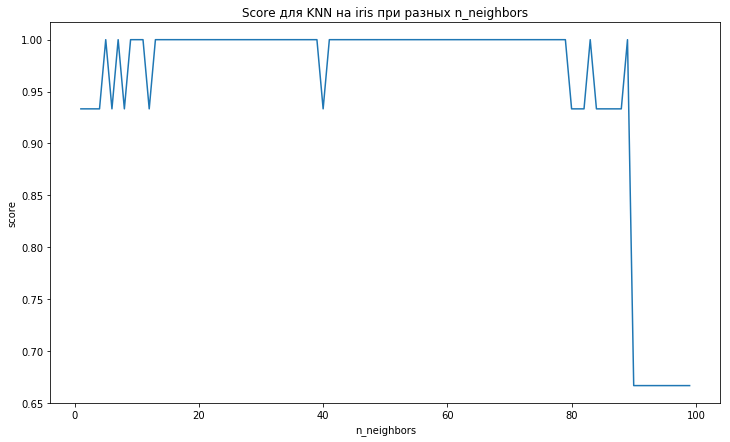

In [14]:
max_k = 100
results = np.empty(max_k - 1, dtype=float)
for k in range(1, max_k):
    model = MyKNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    results[k - 1] = model.score(X_test, y_test)

task_3_best_k = results.argmax() + 1
print('Best score with n_neighdors = {}, max score = {:0.3}'.
      format(task_3_best_k, results[task_3_best_k]))

plt.figure(figsize=(12, 7))
plt.title('Score для KNN на iris при разных n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.plot(np.arange(1, max_k), results)

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,
                                                    test_size=0.01,
                                                    stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 57.5 s, sys: 560 ms, total: 58.1 s
Wall time: 58.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 119 ms, sys: 174 ms, total: 293 ms
Wall time: 291 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 11s, sys: 319 ms, total: 1min 12s
Wall time: 1min 13s


array([9., 6., 7., 3., 1., 1., 9., 9., 5., 1., 4., 9., 8., 2., 4., 0., 5.,
       6., 5., 7., 0., 6., 4., 4., 8., 4., 2., 8., 3., 2., 3., 5., 3., 6.,
       4., 9., 4., 7., 6., 9., 6., 0., 6., 2., 7., 5., 1., 1., 1., 6., 9.,
       3., 1., 2., 2., 5., 4., 4., 6., 8., 2., 7., 2., 3., 1., 2., 8., 4.,
       3., 0., 3., 7., 5., 6., 0., 6., 1., 5., 0., 8., 2., 7., 3., 1., 5.,
       1., 7., 6., 3., 3., 3., 2., 9., 8., 8., 8., 2., 9., 0., 1., 9., 4.,
       7., 9., 4., 3., 3., 3., 7., 2., 5., 7., 7., 7., 6., 8., 4., 9., 3.,
       1., 0., 4., 1., 5., 4., 4., 7., 1., 8., 3., 4., 8., 9., 1., 5., 2.,
       7., 6., 2., 9., 1., 2., 0., 3., 6., 5., 0., 8., 6., 3., 7., 2., 3.,
       5., 9., 7., 7., 2., 6., 4., 5., 1., 3., 2., 8., 4., 2., 9., 6., 2.,
       0., 7., 8., 0., 8., 5., 9., 6., 3., 9., 8., 6., 0., 9., 5., 8., 0.,
       3., 9., 1., 0., 2., 1., 9., 9., 1., 4., 8., 3., 1., 7., 1., 1., 8.,
       0., 6., 3., 7., 1., 6., 7., 9., 4., 8., 9., 0., 4., 3., 1., 5., 6.,
       6., 1., 1., 1., 1.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 9.74 s, sys: 1.15 s, total: 10.9 s
Wall time: 7.68 s


array([9, 6, 7, 3, 1, 1, 9, 9, 5, 1, 4, 9, 8, 2, 4, 0, 5, 6, 5, 7, 0, 6,
       4, 4, 8, 4, 2, 8, 3, 2, 3, 5, 3, 6, 4, 9, 4, 7, 6, 9, 6, 0, 6, 2,
       7, 5, 1, 1, 1, 6, 9, 3, 1, 2, 2, 5, 4, 4, 6, 8, 2, 7, 2, 3, 1, 2,
       8, 4, 3, 0, 3, 7, 5, 6, 0, 6, 1, 5, 0, 8, 2, 7, 3, 1, 5, 1, 7, 6,
       3, 3, 3, 2, 9, 8, 8, 8, 2, 9, 0, 1, 9, 4, 7, 9, 4, 3, 3, 3, 7, 2,
       5, 7, 7, 7, 6, 8, 4, 9, 3, 1, 0, 4, 1, 5, 4, 4, 7, 1, 8, 3, 4, 8,
       9, 1, 5, 2, 7, 6, 2, 9, 1, 2, 0, 3, 6, 5, 0, 8, 6, 3, 7, 2, 3, 5,
       9, 7, 7, 2, 6, 4, 5, 1, 3, 2, 8, 4, 2, 9, 6, 2, 0, 7, 8, 0, 8, 5,
       9, 6, 3, 9, 8, 6, 0, 9, 5, 8, 0, 3, 9, 1, 0, 2, 1, 9, 9, 1, 4, 8,
       3, 1, 7, 1, 1, 8, 0, 6, 3, 7, 1, 6, 7, 9, 4, 8, 9, 0, 4, 3, 1, 5,
       6, 6, 1, 1, 1, 1, 1, 5, 2, 8, 0, 6, 9, 3, 9, 0, 9, 1, 7, 1, 5, 1,
       5, 1, 6, 0, 1, 2, 8, 0, 9, 4, 4, 3, 7, 9, 9, 3, 6, 6, 8, 5, 6, 2,
       0, 3, 5, 4, 2, 9, 2, 8, 2, 5, 5, 1, 6, 0, 8, 5, 1, 9, 7, 5, 5, 0,
       5, 0, 3, 3, 4, 5, 7, 2, 6, 9, 6, 3, 3, 4, 3,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 10s, sys: 168 ms, total: 1min 10s
Wall time: 1min 10s


array([[0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0.5, 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 9.69 s, sys: 1.16 s, total: 10.8 s
Wall time: 7.31 s


array([[0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0.5, 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [24]:
clf.score(X_test, y_test)

0.9628571428571429

In [25]:
my_clf.score(X_test, y_test)

0.9628571428571429

## Задание 4

### IRIS

In [26]:
clf = KNeighborsClassifier(n_neighbors=task_3_best_k, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=task_3_best_k, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 912 µs, sys: 183 µs, total: 1.09 ms
Wall time: 967 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 265 µs, sys: 41 µs, total: 306 µs
Wall time: 296 µs


In [30]:
%time clf.predict(X_test)

CPU times: user 1.3 ms, sys: 187 µs, total: 1.49 ms
Wall time: 1.33 ms


array([2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1])

In [31]:
%time my_clf.predict(X_test)

CPU times: user 642 µs, sys: 89 µs, total: 731 µs
Wall time: 642 µs


array([2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1])

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1.13 ms, sys: 239 µs, total: 1.37 ms
Wall time: 1.12 ms


array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 507 µs, sys: 62 µs, total: 569 µs
Wall time: 543 µs


array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ]])

In [34]:
clf.score(X_test, y_test)

0.8666666666666667

In [35]:
my_clf.score(X_test, y_test)

0.8666666666666667

### MNIST

In [36]:
clf = KNeighborsClassifier(n_neighbors=task_3_best_k, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=task_3_best_k, algorithm='kd_tree')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,
                                                    test_size=0.01,
                                                    stratify=mnist.target)

In [38]:
%time clf.fit(X_train, y_train)

CPU times: user 53.1 s, sys: 386 ms, total: 53.5 s
Wall time: 53.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
%time my_clf.fit(X_train, y_train)

CPU times: user 53.1 s, sys: 518 ms, total: 53.7 s
Wall time: 53.5 s


In [40]:
%time clf.predict(X_test)

CPU times: user 1min 8s, sys: 87.2 ms, total: 1min 8s
Wall time: 1min 8s


array([5., 9., 6., 5., 7., 6., 3., 0., 8., 2., 5., 8., 7., 1., 9., 3., 4.,
       3., 3., 7., 1., 2., 2., 4., 5., 3., 4., 9., 9., 8., 9., 0., 2., 1.,
       0., 1., 4., 2., 8., 9., 3., 1., 2., 4., 9., 6., 0., 0., 1., 5., 7.,
       9., 2., 1., 2., 1., 9., 5., 1., 1., 3., 1., 3., 1., 2., 5., 3., 7.,
       8., 3., 2., 8., 4., 3., 6., 2., 4., 9., 6., 2., 0., 3., 3., 0., 4.,
       7., 7., 6., 2., 4., 2., 1., 1., 7., 8., 5., 2., 9., 5., 2., 1., 9.,
       2., 6., 6., 4., 2., 4., 3., 4., 9., 6., 9., 3., 0., 1., 3., 6., 3.,
       4., 2., 0., 0., 2., 8., 6., 1., 5., 3., 7., 6., 8., 6., 1., 9., 2.,
       2., 9., 1., 9., 5., 6., 6., 2., 5., 7., 6., 9., 9., 3., 9., 9., 2.,
       0., 0., 6., 4., 2., 0., 9., 6., 1., 6., 4., 3., 1., 1., 9., 0., 4.,
       5., 3., 0., 7., 1., 6., 8., 8., 8., 6., 5., 9., 3., 2., 5., 4., 1.,
       7., 6., 6., 0., 8., 2., 5., 2., 3., 9., 4., 3., 1., 4., 4., 7., 2.,
       9., 1., 9., 5., 6., 3., 4., 1., 2., 7., 5., 5., 1., 1., 0., 3., 8.,
       7., 6., 8., 5., 0.

In [41]:
%time my_clf.predict(X_test)

CPU times: user 55.8 s, sys: 47.2 ms, total: 55.9 s
Wall time: 55.9 s


array([5, 9, 6, 5, 7, 6, 3, 0, 8, 2, 5, 8, 7, 1, 9, 3, 4, 3, 3, 7, 1, 2,
       2, 4, 5, 3, 4, 9, 9, 8, 9, 0, 2, 1, 0, 1, 4, 2, 8, 9, 3, 1, 2, 4,
       9, 6, 0, 0, 1, 5, 7, 9, 2, 1, 2, 1, 9, 5, 1, 1, 3, 1, 3, 1, 2, 5,
       3, 7, 8, 3, 2, 8, 4, 3, 6, 2, 4, 9, 6, 2, 0, 3, 3, 0, 4, 7, 7, 6,
       2, 4, 2, 1, 1, 7, 8, 5, 2, 9, 5, 2, 1, 9, 2, 6, 6, 4, 2, 4, 3, 4,
       9, 6, 9, 3, 0, 1, 3, 6, 3, 4, 2, 0, 0, 2, 8, 6, 1, 5, 3, 7, 6, 8,
       6, 1, 9, 2, 2, 9, 1, 9, 5, 6, 6, 2, 5, 7, 6, 9, 9, 3, 9, 9, 2, 0,
       0, 6, 4, 2, 0, 9, 6, 1, 6, 4, 3, 1, 1, 9, 0, 4, 5, 3, 0, 7, 1, 6,
       8, 8, 8, 6, 5, 9, 3, 2, 5, 4, 1, 7, 6, 6, 0, 8, 2, 5, 2, 3, 9, 4,
       3, 1, 4, 4, 7, 2, 9, 1, 9, 5, 6, 3, 4, 1, 2, 7, 5, 5, 1, 1, 0, 3,
       8, 7, 6, 8, 5, 0, 5, 8, 8, 2, 3, 3, 2, 5, 6, 6, 9, 3, 6, 4, 5, 3,
       7, 2, 0, 1, 7, 8, 7, 8, 3, 0, 4, 9, 1, 3, 1, 7, 7, 4, 0, 0, 1, 9,
       3, 1, 4, 0, 8, 9, 1, 5, 5, 6, 1, 4, 0, 1, 7, 4, 6, 5, 7, 0, 2, 9,
       4, 0, 9, 9, 6, 3, 9, 4, 0, 5, 6, 0, 7, 9, 5,

In [42]:
%time clf.predict_proba(X_test)

CPU times: user 1min 8s, sys: 78.2 ms, total: 1min 8s
Wall time: 1min 8s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0. , 0. , ..., 0. , 0. , 0.8],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0.2, 0. ]])

In [43]:
%time my_clf.predict_proba(X_test)

CPU times: user 55.9 s, sys: 63.3 ms, total: 55.9 s
Wall time: 55.9 s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0. , 0. , ..., 0. , 0. , 0.8],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0.2, 0. ]])

In [44]:
clf.score(X_test, y_test)

0.97

In [45]:
my_clf.score(X_test, y_test)

0.97

## Задание 5

* seaborn — библиотека для визуализации данных, основана на matplotlib
* matplotlib — библиотека для рисования графиков
* train_test_split — разбивает данные на две части: тренировочную и тестовую
* Pipeline (from sklearn.pipeline import Piьpeline) — для последовательного преобразования данных
* StandardScaler (from sklearn.preprocessing import StandardScaler) — стандартизует данные, обнуляя среднее и масштабирует до единичной дисперсии
* ClassifierMixin — миксин для всех классификаторов в sklearn
* NeighborsBase — базовый класс для всех моделей, работающих с ближайшими соседями
* KNeighborsMixin — миксин для всех моделей, работающих с k ближайшими соседями
* SupervisedIntegerMixin — миксин для всех моделей, которые обучаются с использованием X в качестве данных обучения и y в качестве значений целевой переменной